<a href="https://colab.research.google.com/github/myazdani/boosted-shortest-paths/blob/main/boosted_shortest_paths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## Karate club example

- load karate club network and plot shortest path between two nodes

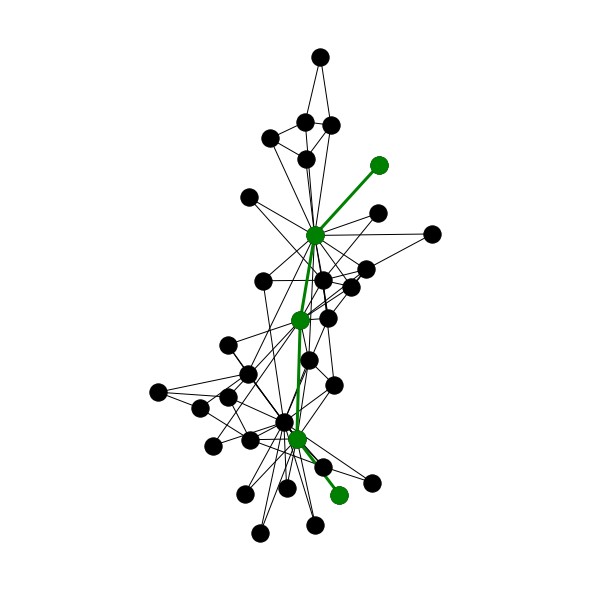

In [2]:
plt.figure(figsize=(8,8))
G = nx.karate_club_graph()
pos = nx.spring_layout(G)
nx.draw(G,pos,node_color='k')
# draw path in red
path = nx.shortest_path(G,source=14,target=11)
path_edges = list(zip(path,path[1:]))
nx.draw_networkx_nodes(G,pos,nodelist=path,node_color='g')
nx.draw_networkx_edges(G,pos,edgelist=path_edges,edge_color='g',width=3)
plt.axis('equal')
plt.show()

## Edge weights between connections based on edge betweenness centrality

- plot shortest path based on edge weights with edge betweenness centrality
- compare with a purturbed edge weights

In [3]:
bb = nx.edge_betweenness_centrality(G, normalized=True)
nx.set_edge_attributes(G, bb, "betweenness")
noise_mag = 0.1

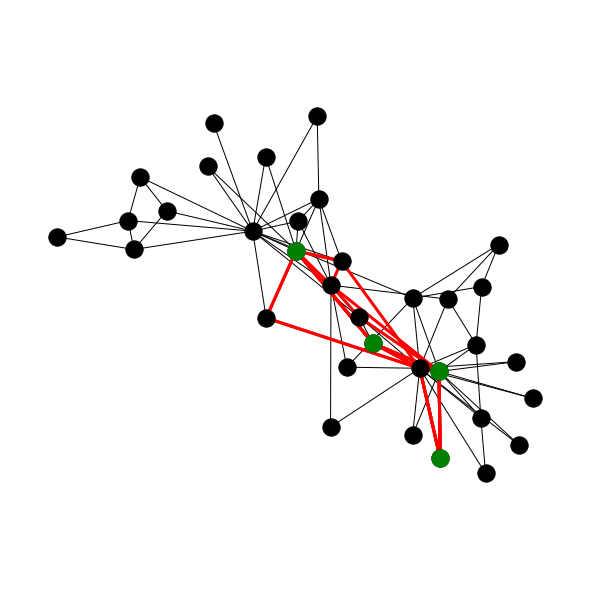

In [4]:
plt.figure(figsize=(8,8))
pos = nx.spring_layout(G)
nx.draw(G,pos,node_color='k')
path = nx.shortest_path(G,source=14,target=1,weight='betweenness')
path_edges = list(zip(path,path[1:]))
nx.draw_networkx_nodes(G,pos,nodelist=path,node_color='g')
nx.draw_networkx_edges(G,pos,edgelist=path_edges,edge_color='g',width=3)
for _ in range(10):
    G_bar = nx.karate_club_graph()
    bb = nx.edge_betweenness_centrality(G_bar, normalized=True)
    bb_noisy = {k: v+noise_mag*np.random.rand() for k, v in bb.items()}
    nx.set_edge_attributes(G_bar, bb_noisy, "noisy_betweenness")
    path = nx.shortest_path(G_bar,source=14,target=1,weight='noisy_betweenness')
    path_edges = list(zip(path,path[1:]))
    nx.draw_networkx_edges(G_bar,pos,edgelist=path_edges,edge_color='r',width=3)
plt.axis('equal')
plt.show()